# 8. This question involves the use of simple linear regression on the Auto data set.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.api import OLS, add_constant
from statsmodels.graphics.gofplots import ProbPlot


### Importing data

In [2]:
auto = pd.read_csv("https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe058464c2528214f6bba/1610604632209/Auto.csv")

In [3]:
auto_1 = auto.copy()

#### Removing symbol **'?'**

In [4]:
auto = auto[auto.horsepower != '?']

In [5]:
auto = auto.drop(['cylinders','displacement','weight','acceleration','year','origin', 'name'], axis=1)

#### Converting data-type 'object' to 'int64'

In [6]:
auto["horsepower"] = pd.to_numeric(auto["horsepower"])
auto.dtypes


mpg           float64
horsepower      int64
dtype: object

## 8(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

In [14]:
def run_model(x, y, model_fit=OLS):
    '''
    accepts x and y and returns fitted model
    '''
    return model_fit(y, add_constant(x)).fit()


In [17]:
X=auto['horsepower']
y=auto['mpg']
model_fit = run_model(x=X, y=y, model_fit=OLS)
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           7.03e-81
Time:                        22:07:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

**Observation:**
1.  We can see that 'R-squared' is 0.606. So model is correct for ~60% of the time. So next I am looking for outliers.

So the equation of the linear regression line from the model is: **Y_Predict= 39.9359 - 0.1578*X**

### i. Is there a relationship between the predictor and the re- sponse?

**Yes**, the relationship between the predictor variables and the response variable was statistically significant, because the F-statistic: 599.7 which is grater than 1 and probability value which less. This tells us we reject the null hypothesis and conclude there is statiscally relationship between "horsepower" and "mpg".

### ii. How strong is the relationship between the predictor and the response?

Here value of the R-squared is 0.606, so 60% variability is explained by the model.


### iii. Is the relationship between the predictor and the response positive or negative?

Here is we have negetive coefficient, which means we have negetive relationship.

### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [10]:
import scipy.stats as st

#Predicting for horsepower 98
y_pred=39.9359-0.1578*98 
print(y_pred)

#95% confidence interval
st.t.interval(confidence=0.95, df=len(auto['mpg'])-1, loc=np.mean(auto['mpg']), scale=st.sem(auto['mpg']))

24.4715


(22.670877187773137, 24.22095954692074)

**Answer:**
1.  Predicted horsepower value of 98 is 24.47.
2)   we can say With 95% confidence that this model's mileage value lies between 22.67 and 24.22.

## (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

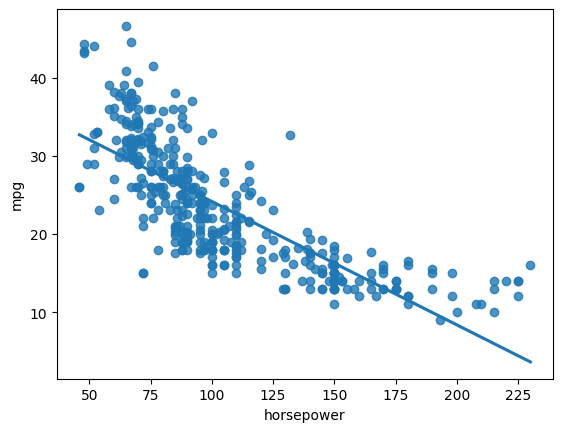

In [12]:
sns.regplot(x='horsepower', y='mpg', data=auto, ci=None)

## (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

**Reference:** https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

In [18]:
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


/var/folders/qd/78cm3bf52xs_khrj7wkd_myc0000gn/T/ipykernel_31738/765372950.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  abs_resid_top_3 = abs_resid[:3]


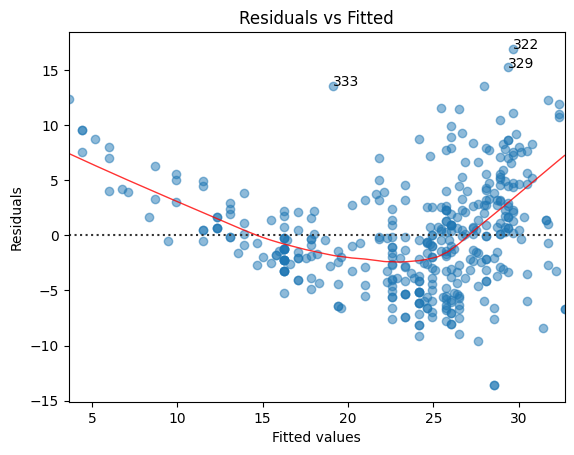

In [34]:
def _residplot(x, y, model_fitted_y):
    plot = plt.figure()
    plot.axes[0] = sns.residplot(x=model_fitted_y, y=y,
                                      lowess=True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot.axes[0].set_title('Residuals vs Fitted')
    plot.axes[0].set_xlabel('Fitted values')
    plot.axes[0].set_ylabel('Residuals')

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_residuals[i]))

    return True


_ = _residplot(X, y, model_fitted_y)

**Observations:**
In the above plot, residuals shows a U-shaped pattern, so data might be non-linear.

/Volumes/work/MTH522/project/block_2/.venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


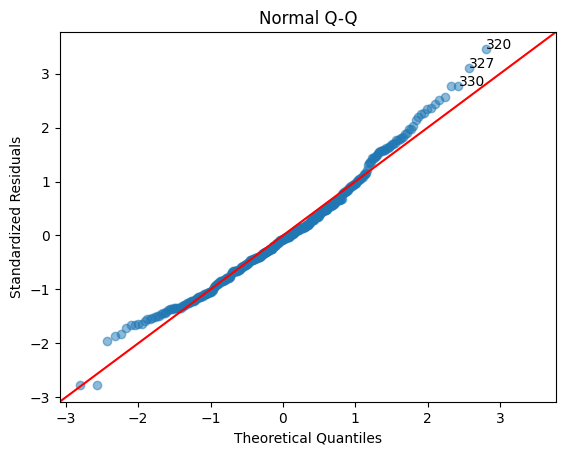

In [33]:
def _normal_qq_plot(model_norm_residuals):
    QQ = ProbPlot(model_norm_residuals)
    plot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot.axes[0].set_title('Normal Q-Q')
    plot.axes[0].set_xlabel('Theoretical Quantiles')
    plot.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]

    for r, i in enumerate(abs_norm_resid_top_3):
        plot.axes[0].annotate(
            i,
            xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                model_norm_residuals[i])
        )

    return True, abs_norm_resid_top_3


_, abs_norm_resid_top_3 = _normal_qq_plot(model_norm_residuals)

**Observation:** The above plot that residual plot is not normally distributed as all othe data points do not lie on the red color line

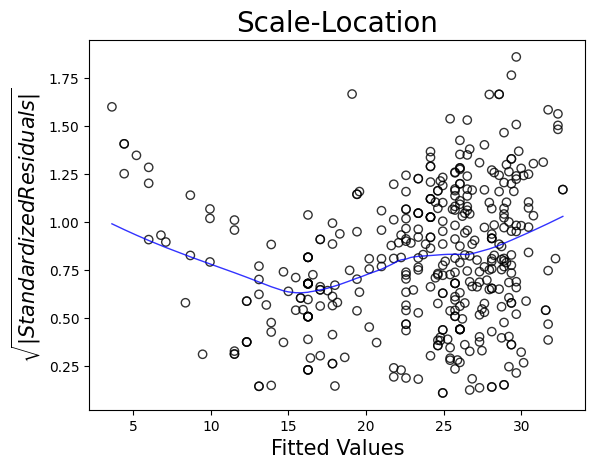

In [35]:
def _scale_location_plot(abs_norm_resid_top_3):
    sns.regplot(x=model_fit.fittedvalues, y=model_norm_residuals_abs_sqrt, scatter=True,
                ci=False,
                lowess=True,
                line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
                scatter_kws={'facecolors': 'none', 'edgecolors': 'black'})

    plt.title('Scale-Location', fontsize=20)
    plt.xlabel('Fitted Values', fontsize=15)
    plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)

    return True


_ = _scale_location_plot(abs_norm_resid_top_3)


**Observations:**
1.  We can come to the conclusion that there are no outliers. As the data is standardized values should be between[-3,3]. The above data is between 0 to 2 which is accetable.

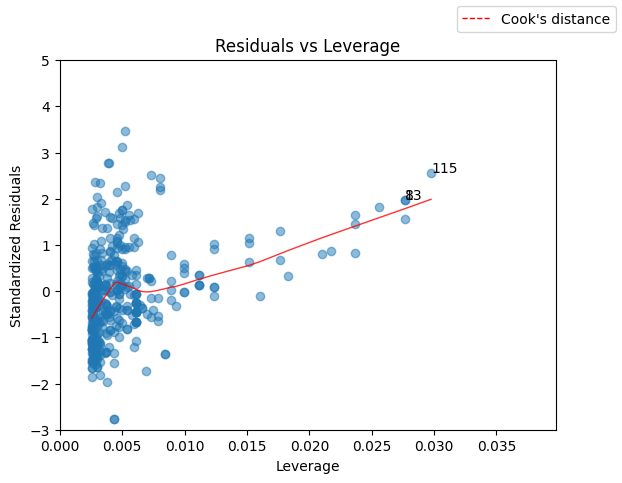

In [36]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def _residuals_vs_leverage_plot():
    plot = plt.figure()
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x=model_leverage, y=model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot.axes[0].set_ylim(-3, 5)
    plot.axes[0].set_title('Residuals vs Leverage')
    plot.axes[0].set_xlabel('Leverage')
    plot.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i])
                                   )

    p = len(model_fit.params)  # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance')  # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50))  # 1 line
    plot.legend(loc='upper right')

    return True


_ = _residuals_vs_leverage_plot()

**Observation:**
1.  From the above graph we can say that, there is no higher leverage points. The points above cooks distance are conidered high leverage points.